In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import machine learning modules from scikit-learn
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression     # For linear regression modeling
from sklearn.metrics import mean_squared_error, r2_score                     # For model evaluation metrics


In [5]:
df = pd.read_csv('appliance_energy.csv')
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


In [7]:
print(df.isnull().sum())


Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


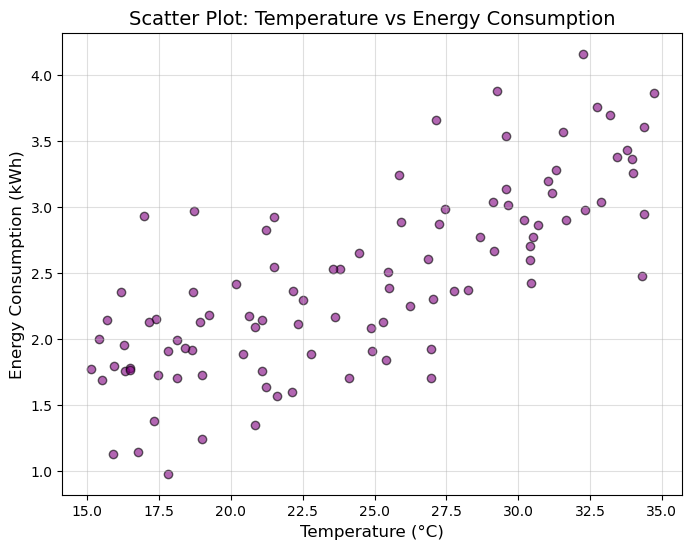

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "appliance_energy.csv"  # Ensure this matches your file name
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
data.head()

# Scatter plot in Jupyter Notebook
plt.figure(figsize=(8, 6))
plt.scatter(data["Temperature (°C)"], data["Energy Consumption (kWh)"], color='purple', alpha=0.6, edgecolors='k')
plt.title("Scatter Plot: Temperature vs Energy Consumption", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)
plt.grid(alpha=0.4)
plt.show()


In [13]:
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [21]:
# Import necessary library
import pandas as pd

# Load the dataset
file_path = "appliance_energy.csv"  # Update with the correct path to your dataset
data = pd.read_csv(file_path)

# Define the dependent (target) variable
y = data["Energy Consumption (kWh)"]  # Replace with the actual column name for the dependent variable

# Define the independent (predictor) variables
X = data.drop(columns=["Energy Consumption (kWh)"])  # Replace with the target column name

# Display the first few rows of X and y to verify
print("Independent Variables (X):")
print(X.head())

print("\nDependent Variable (y):")
print(y.head())


Independent Variables (X):
   Temperature (°C)
0         22.490802
1         34.014286
2         29.639879
3         26.973170
4         18.120373

Dependent Variable (y):
0    2.292604
1    3.251925
2    3.009868
3    1.703533
4    1.702201
Name: Energy Consumption (kWh), dtype: float64


In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = "appliance_energy.csv"  # Replace with the correct file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# 1. Handle Missing Values
# Identify columns with missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Separate features (X) and target variable (y)
y = data["Energy Consumption (kWh)"]  # Replace with your dependent variable column name
X = data.drop(columns=["Energy Consumption (kWh)"])  # Exclude the dependent variable from features

# 2. Split Numerical and Categorical Columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object", "category"]).columns

# 3. Preprocessing Pipelines
# Pipeline for numerical data: handle missing values and standardize
numerical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),  # Fill missing values with the mean
    ("scaler", StandardScaler())  # Scale numerical features
])

# Pipeline for categorical data: handle missing values and encode
categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing values with the most frequent value
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
])

# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_cols),
        ("cat", categorical_pipeline, categorical_cols)
    ]
)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Display the processed data shapes
print("\nShapes of processed data:")
print(f"X_train: {X_train_preprocessed.shape}, X_test: {X_test_preprocessed.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


First few rows of the dataset:
   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201

Missing values in each column:
Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64

Shapes of processed data:
X_train: (80, 1), X_test: (20, 1)
y_train: (80,), y_test: (20,)


In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_preprocessed, y_train)



LinearRegression()

In [37]:
y_pred = model.predict(X_test_preprocessed)


In [39]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 0.16


In [41]:
from sklearn.metrics import r2_score

# Assuming `y_test` contains the true values, and `y_pred` contains the predicted values
# Example: Make predictions using a trained model
# y_pred = model.predict(X_test_preprocessed)

# Calculate R-squared error
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R²): {r2:.2f}")


R-squared (R²): 0.61


In [43]:
import joblib 
joblib.dump(model, 'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [45]:
model = joblib.load('appliance_energy_model.pkl')

In [47]:
temp = np.array([[22.49]])

In [49]:
prediction = model.predict(temp)
print("Predicted energy consumption:", prediction)

Predicted energy consumption: [14.19900511]
